In [ ]:
# Install if needed (optional in most Colab environments)
!pip install seaborn matplotlib pandas

# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting setup
sns.set(style="whitegrid")


In [ ]:
import pandas as pd
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
    .appName("Colab PySpark Example") \
    .getOrCreate()

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving EMPLOYEE_ATTRITION_ANALYSIS.csv to EMPLOYEE_ATTRITION_ANALYSIS.csv


In [ ]:
df_main=pd.read_csv('EMPLOYEE_ATTRITION_ANALYSIS.csv')

In [ ]:
df_main

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,...,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Female,...,5993,8,Yes,11,Excellent,80,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,Male,...,5130,1,No,23,Outstanding,80,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,...,2090,6,Yes,15,Excellent,80,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Female,...,2909,1,Yes,11,Excellent,80,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Male,...,3468,9,No,12,Excellent,80,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,2061,Male,...,2571,4,No,17,Excellent,80,17,5,2,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,2062,Male,...,9991,4,No,15,Excellent,80,9,7,7,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Male,...,6142,1,Yes,20,Outstanding,80,6,6,2,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,2065,Male,...,5390,2,No,14,Excellent,80,17,9,6,8


In [ ]:
print("Count of employee in organization")
print(df_main['Attrition'].count())

Count of employee in organization
1470


In [ ]:
df_Employee_leaving=df_main[df_main['Attrition']=='Yes']
print("Total count of employee leaving the organization")
print(df_Employee_leaving['Attrition'].count())

Total count of employee leaving the organization
237


In [ ]:
df_Employee_not_leaving=df_main[df_main['Attrition']=='No']
print("Total count of not employee leaving the organization")
print(df_Employee_not_leaving['Attrition'].count())

Total count of not employee leaving the organization
1233


In [ ]:
print("Department of Employee leaving with count")
print(df_Employee_leaving['Department'].value_counts())

Department of Employee leaving with count
Department
Research & Development    133
Sales                      92
Human Resources            12
Name: count, dtype: int64


In [ ]:
print("total no. of employee in Research and development")
print(df_main[df_main['Department']=='Research & Development']['Department'].count())
print("-----------------------------------------------------------------------------------")
print("total no. of employee in sales")
print(df_main[df_main['Department']=='Sales']['Department'].count())
print("-----------------------------------------------------------------------------------")
print("total no. of employee in human resources")
print(df_main[df_main['Department']=='Human Resources']['Department'].count())

total no. of employee in Research and development
961
-----------------------------------------------------------------------------------
total no. of employee in sales
446
-----------------------------------------------------------------------------------
total no. of employee in human resources
63


In [ ]:
print("Percentage of employee leaving a paricular department")
print("-----------------------------------------------------------------------------------")
print("For Research and development")
print((df_Employee_leaving[df_Employee_leaving['Department']=='Research & Development']['Department'].count()/df_main[df_main['Department']=='Research & Development']['Department'].count())*100)
print("-----------------------------------------------------------------------------------")
print("For Sales")
print((df_Employee_leaving[df_Employee_leaving['Department']=='Sales']['Department'].count()/df_main[df_main['Department']=='Sales']['Department'].count())*100)
print("-----------------------------------------------------------------------------------")
print("For Human Resources")
print((df_Employee_leaving[df_Employee_leaving['Department']=='Human Resources']['Department'].count()/df_main[df_main['Department']=='Human Resources']['Department'].count())*100)

Percentage of employee leaving a paricular department
-----------------------------------------------------------------------------------
For Research and development
13.839750260145681
-----------------------------------------------------------------------------------
For Sales
20.62780269058296
-----------------------------------------------------------------------------------
For Human Resources
19.047619047619047


In [ ]:
print("Count of employee working over time")
print(df_main[df_main['OverTime']=='Yes']['OverTime'].count())

Count of employee working over time
416


In [ ]:
print("Count of employee working over time in sales team")
print(df_main[(df_main['OverTime']=='Yes') & (df_main['Department']=='Sales')]['OverTime'].count())

Count of employee working over time in sales team
128


In [ ]:
print("Count of employee working over time in HR team")
print(df_main[(df_main['OverTime']=='Yes') & (df_main['Department']=='Human Resources')]['OverTime'].count())

Count of employee working over time in HR team
17


In [ ]:
print("Count of employee working over time in HR team")
print(df_main[(df_main['OverTime']=='Yes') & (df_main['Department']=='Research & Development')]['OverTime'].count())

Count of employee working over time in HR team
271


In [ ]:
print("count of employee leaving in sales team for working overtime")
print(df_Employee_leaving[(df_Employee_leaving['OverTime']=='Yes') & (df_Employee_leaving['Department']=='Sales')]['OverTime'].count())

count of employee leaving in sales team for working overtime
48


In [ ]:
print("count of employee leaving in HR team for working overtime")
print(df_Employee_leaving[(df_Employee_leaving['OverTime']=='Yes') & (df_Employee_leaving['Department']=='Human Resources')]['OverTime'].count())

count of employee leaving in HR team for working overtime
5


In [ ]:
print("count of employee leaving in Research & Development team for working overtime")
print(df_Employee_leaving[(df_Employee_leaving['OverTime']=='Yes') & (df_Employee_leaving['Department']=='Research & Development')]['OverTime'].count())

count of employee leaving in Research & Development team for working overtime
74


In [ ]:
print((48/92)*100)--sales
print((5/12)*100)--HR
print((74/133)*100)---RnD

52.17391304347826
41.66666666666667
55.639097744360896


In [ ]:
print("Clearly Overtime is dragging Employee to quit by 50%")

Clearly Overtime is dragging Employee to quit by 50%


In [ ]:
print("No. of male and female employee")
print(df_main['Gender'].value_counts())

No. of male and female employee
Gender
Male      882
Female    588
Name: count, dtype: int64


In [ ]:
print("Gender of people leaving")
print(df_Employee_leaving['Gender'].value_counts())

Gender of people leaving
Gender
Male      150
Female     87
Name: count, dtype: int64


In [ ]:
print("Percenage of male and female employee leaving")
print((df_Employee_leaving[df_Employee_leaving['Gender']=='Male']['Gender'].count()/df_main[df_main['Gender']=='Male']['Gender'].count())*100)
print((df_Employee_leaving[df_Employee_leaving['Gender']=='Female']['Gender'].count()/df_main[df_main['Gender']=='Female']['Gender'].count())*100)

Percenage of male and female employee leaving
17.006802721088434
14.795918367346939


In [ ]:
print("Since there is not that big of a difference in percentage of male and female employee leaving the organization it will not be considererd")

Since there is not that big of a difference in percentage of male and female employee leaving the organization it will not be considererd


In [ ]:
print("Employee Attrition based on Distance")
print(df_Employee_leaving['DistanceFromHome'].value_counts())

Employee Attrition based on Distance
DistanceFromHome
2     28
1     26
9     18
3     14
24    12
7     11
10    11
8     10
5     10
4      9
6      7
16     7
25     6
13     6
22     6
12     6
23     5
15     5
17     5
29     5
14     4
11     4
20     4
18     4
27     3
26     3
19     3
21     3
28     2
Name: count, dtype: int64


<ipython-input-11-4265174959>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')


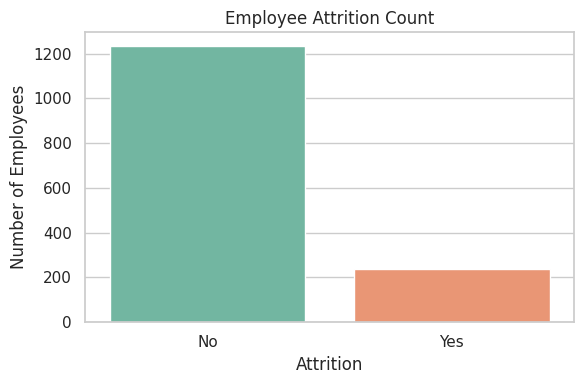

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [ ]:
# Count & Rate
attrition_counts = df_main['Attrition'].value_counts()
attrition_rate = df_main['Attrition'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')
plt.title('Employee Attrition Count')
plt.ylabel('Number of Employees')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

# Print Attrition %
attrition_rate


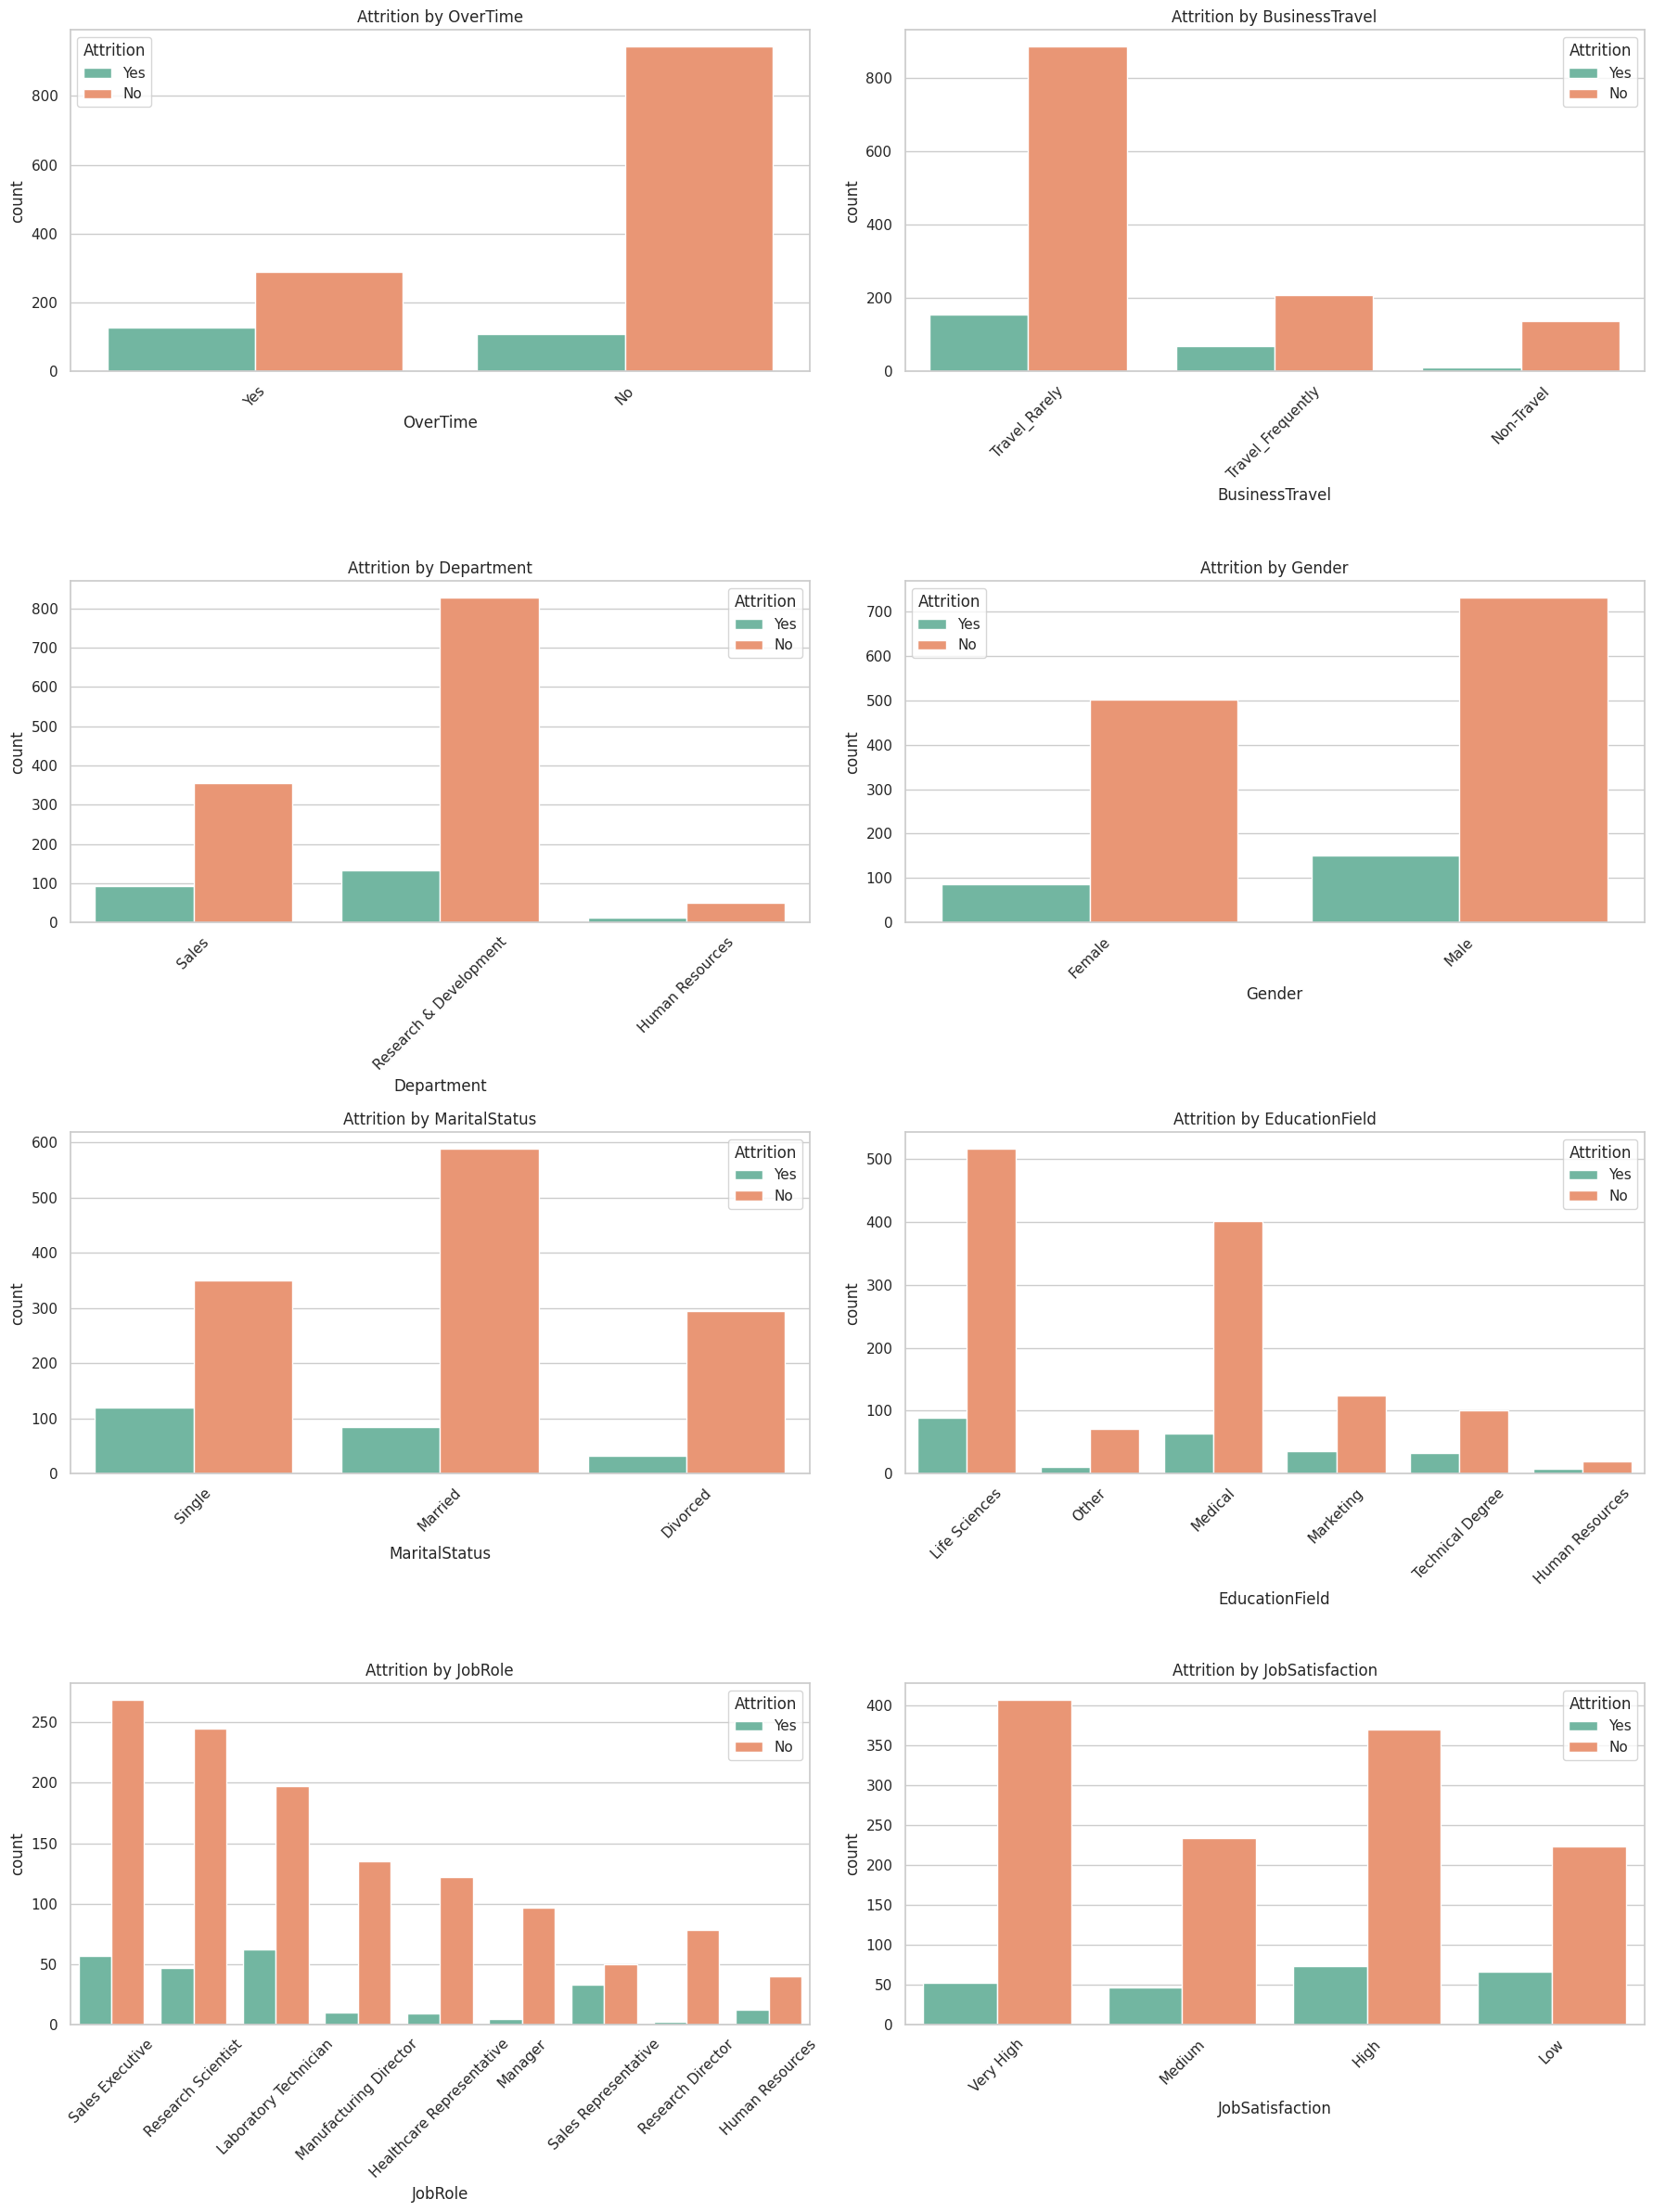

In [ ]:
categorical_features = ['OverTime', 'BusinessTravel', 'Department', 'Gender',
                        'MaritalStatus', 'EducationField', 'JobRole', 'JobSatisfaction']

fig, axes = plt.subplots(4, 2, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df_main, x=col, hue='Attrition', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Attrition by {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


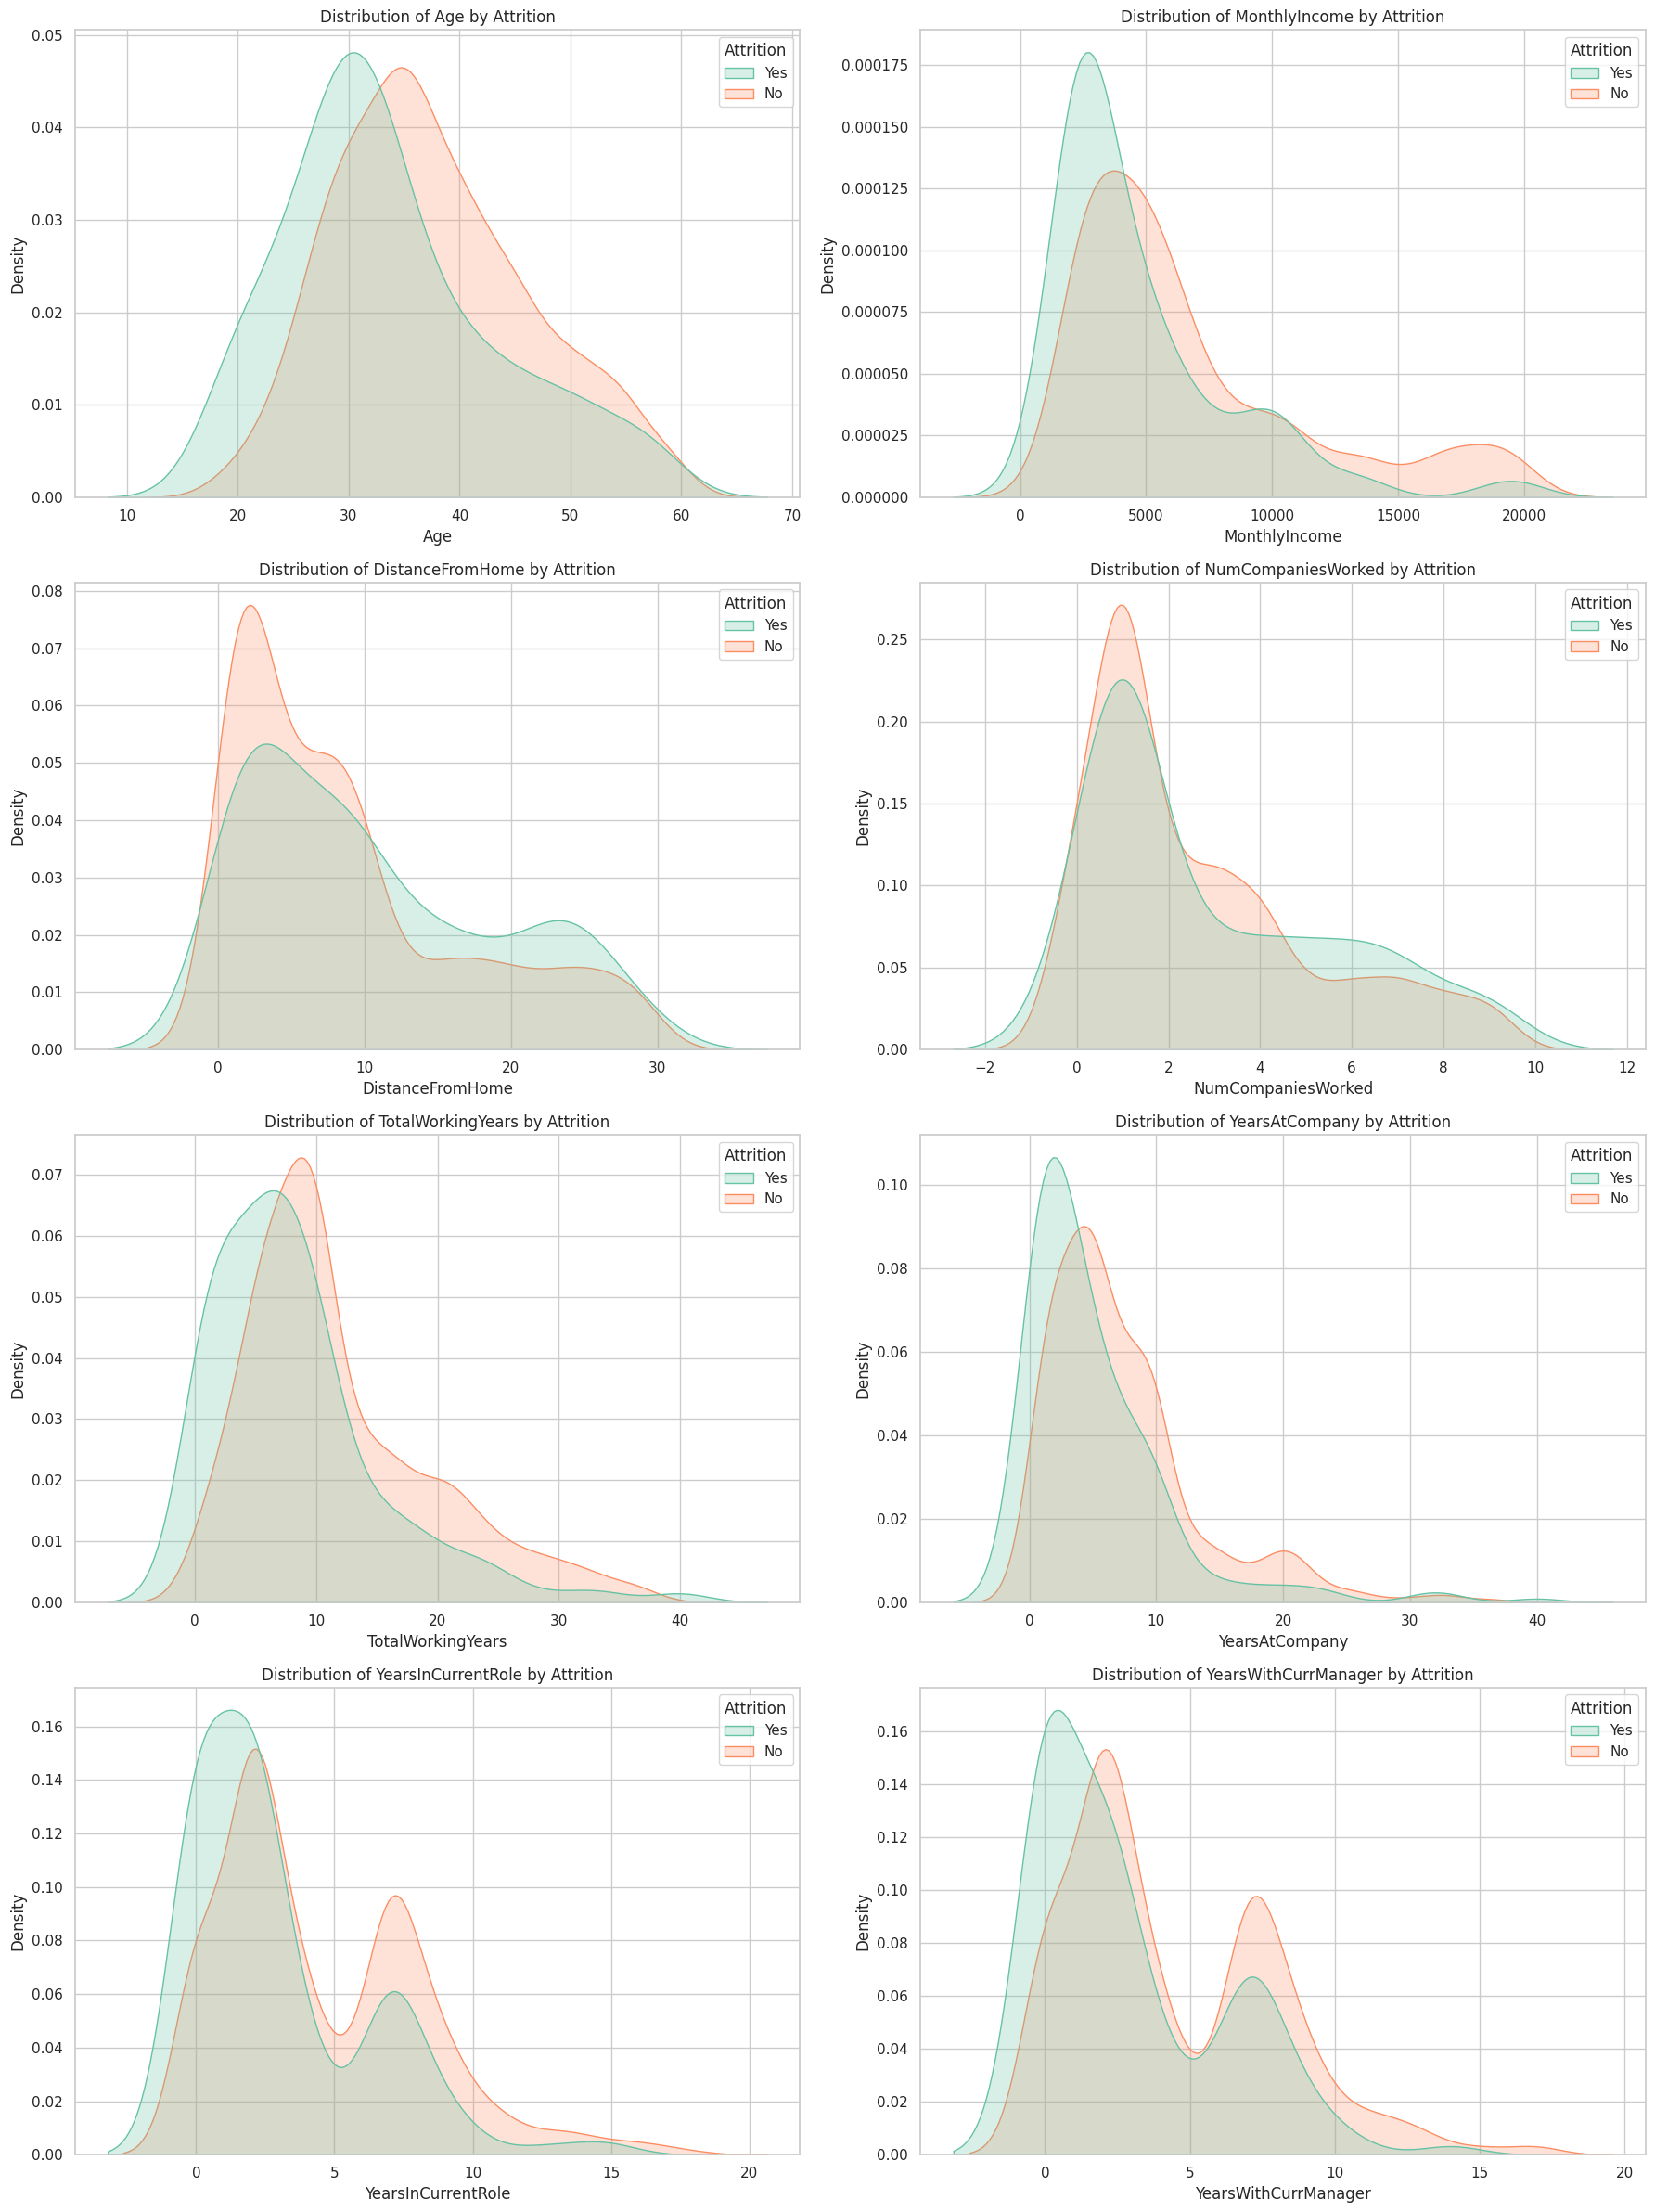

In [ ]:
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'NumCompaniesWorked',
                      'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsWithCurrManager']

fig, axes = plt.subplots(4, 2, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.kdeplot(data=df_main, x=col, hue='Attrition', ax=axes[i], fill=True, common_norm=False, palette='Set2')
    axes[i].set_title(f'Distribution of {col} by Attrition')

plt.tight_layout()
plt.show()


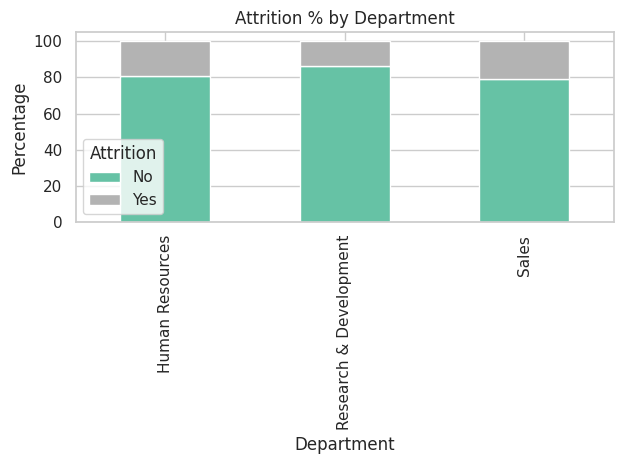

In [ ]:
dept_attr = pd.crosstab(df_main['Department'], df_main['Attrition'], normalize='index') * 100
dept_attr.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Attrition % by Department')
plt.ylabel('Percentage')
plt.xlabel('Department')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


Each bar represents a department, and the height is 100% (normalized).
The gray portion shows the percentage of employees who left, while the green shows who stayed.

Insights:

Sales Department has the highest attrition % among all departments (~22%).

Research & Development retains more employees.

Human Resources shows lower attrition but with a small sample size.

Why it's valuable:
Helps stakeholders quickly identify high-risk departments and prioritize retention efforts there.

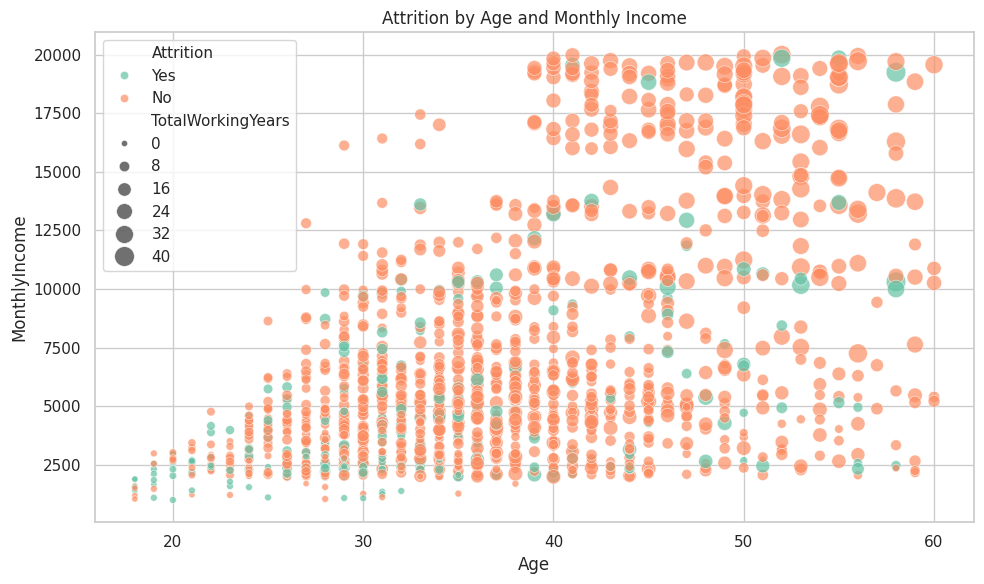

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='Age', y='MonthlyIncome', hue='Attrition', size='TotalWorkingYears', sizes=(20, 200), alpha=0.7, palette='Set2')
plt.title('Attrition by Age and Monthly Income')
plt.tight_layout()
plt.show()


Each dot represents an employee, plotted based on:

X-axis: Age

Y-axis: Monthly Income

Color: Attrition status (Yes/No)

Size: Total working years

How to read it:

Green or red dots show whether the employee stayed or left.

Smaller bubbles = less experience; larger bubbles = more experience.

Clusters of red in the bottom-left corner (young + low income + low experience) are visible.

Insights:

Younger employees (<30) with low income and less experience are more likely to leave.

Employees over 40 earning well tend to stay.

Why it's valuable:
Reveals underlying patterns where low pay and early career stage are leading causes of attrition — especially useful for HR policy change.

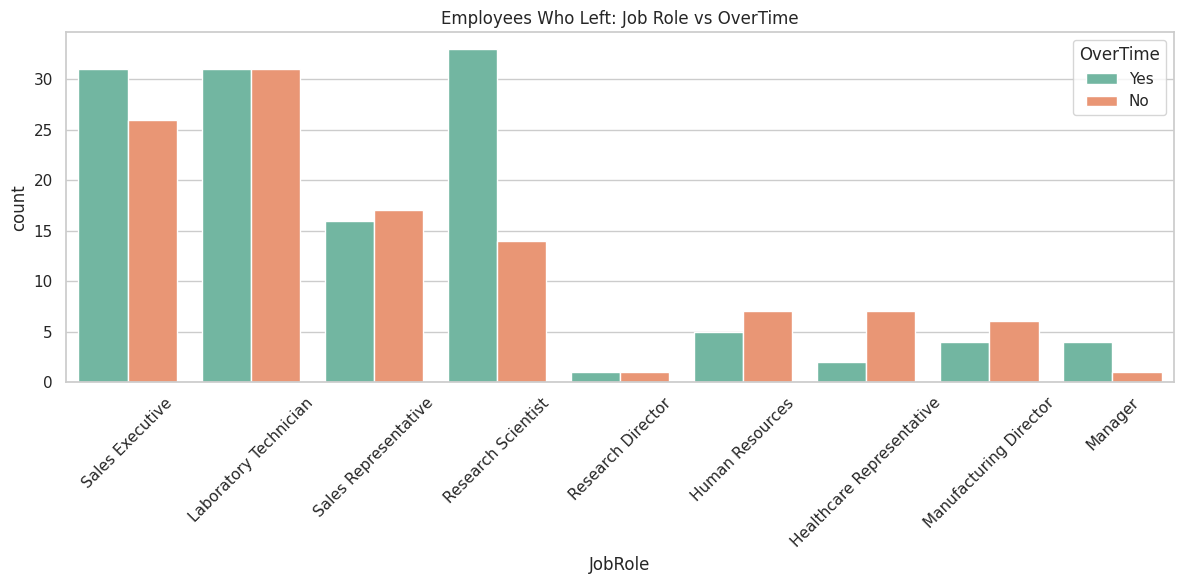

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_main[df_main['Attrition'] == 'Yes'], x='JobRole', hue='OverTime', palette='Set2')
plt.title('Employees Who Left: Job Role vs OverTime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart compares how many employees left across job roles, split by whether they worked OverTime.

How to read it:

X-axis: Different Job Roles (e.g., Sales Executive, Research Scientist)

Bars: Two bars per role — one for OverTime = Yes, another for No

Insights:

OverTime is strongly associated with attrition in roles like:

Sales Executive

Research Scientist

Lab Technician

Roles like Manager and Director have less attrition regardless of OverTime.

Why it's valuable:
Pinpoints job roles where excessive workload (OverTime) leads to higher turnover. Useful for redesigning work schedules or load distribution.



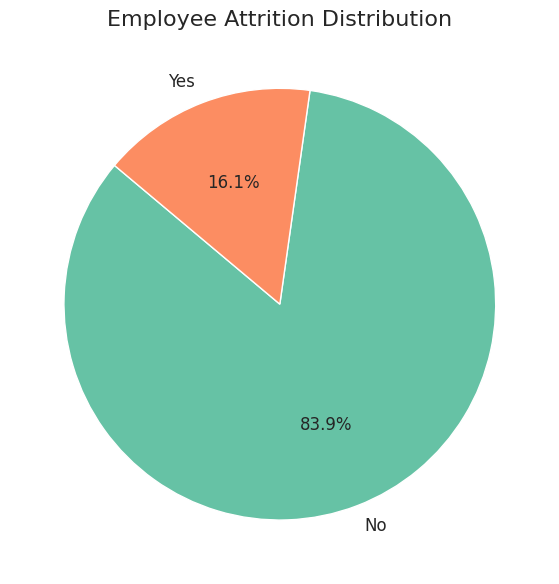

In [ ]:
# Set style for better visuals
#plt.style.use('seaborn-pastel')

# Count of Attrition values
attrition_counts = df_main['Attrition'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62']  # soft green and orange
wedges, texts, autotexts = ax.pie(
    attrition_counts,
    labels=attrition_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
ax.set_title("Employee Attrition Distribution", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipython-input-10-1844708840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_main, x='Attrition', y='Age', palette='pastel')


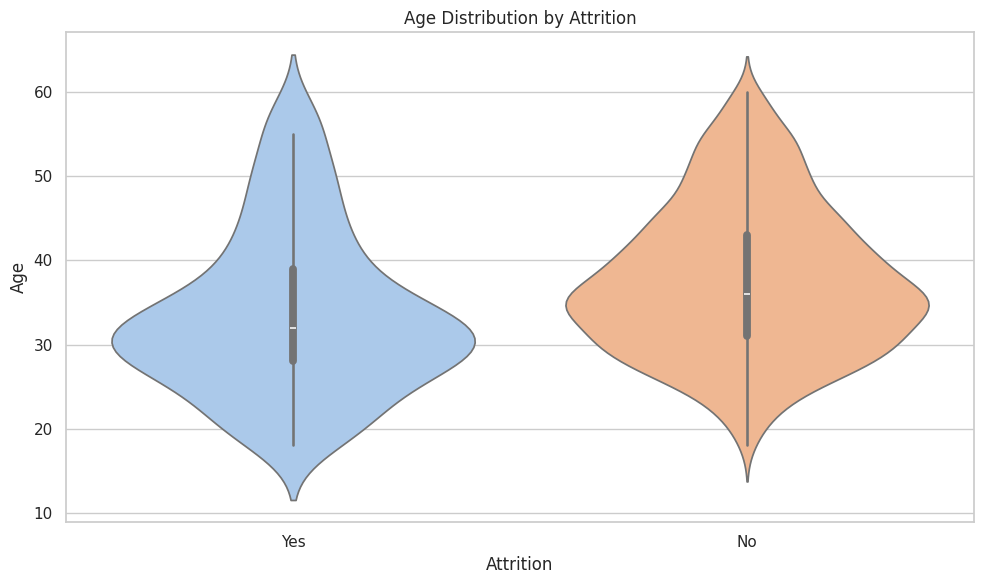

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_main, x='Attrition', y='Age', palette='pastel')
plt.title("Age Distribution by Attrition")
plt.tight_layout()
plt.show()